# Fake News Classifier

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [2]:
df = pd.read_csv("fake-news/train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

In [5]:
df = df.dropna()

In [6]:
messages = df.copy()

In [7]:
messages.reset_index(inplace=True)

In [8]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [9]:
lemma = WordNetLemmatizer()
corpus = []
for i in range(len(messages)):
    review = re.sub("[^a-zA-Z]", " ", messages["title"][i]).lower().split()
    review = [lemma.lemmatize(word) for word in review if not word in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

## Bag of Words

In [10]:
cv = CountVectorizer(max_features = 5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [11]:
X.shape

(18285, 5000)

In [12]:
y = messages['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abandoned', 'abc', 'abc news', 'abe', 'abedin', 'able',
       'abortion', 'abroad', 'absolutely', 'absurd', 'abuse', 'abuse new',
       'abuse new york', 'academy', 'accept', 'accepting', 'access',
       'access pipeline', 'access pipeline protest'], dtype=object)

In [15]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [16]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())
count_df.head()

,abandon,abandoned,abc,abc news,abe,abedin,able,abortion,abroad,absolutely,...,zealand,zero,zika,zika virus,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


accuracy 0.9007383100902379


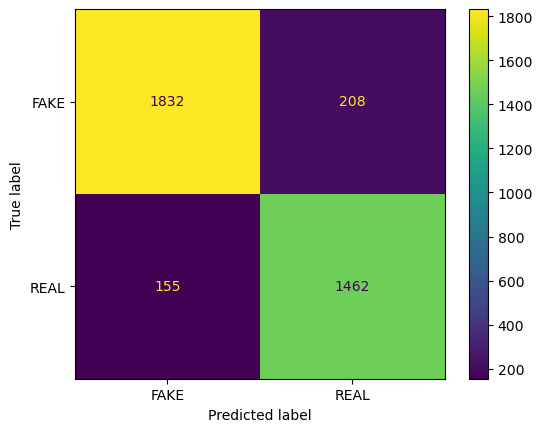

In [17]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FAKE", "REAL"])
disp.plot()
plt.show()

## HyperParameter Tuning

In [18]:
grid_cv = GridSearchCV(MultinomialNB(), param_grid={"alpha": np.arange(0.5,2,0.1)}, cv=10)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'alpha': 1.4999999999999998}
0.8998506245716268


accuracy 0.8996445173639596


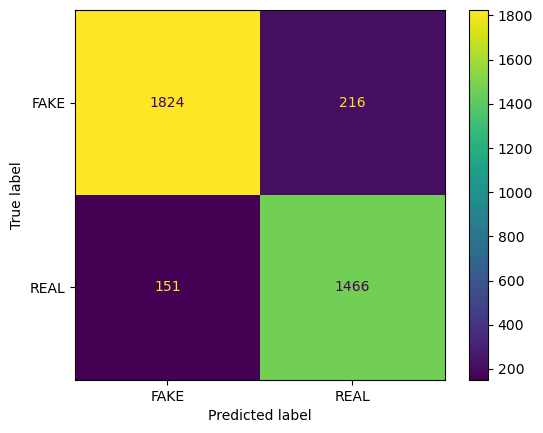

In [19]:
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FAKE", "REAL"])
disp.plot()
plt.show()

## TF-IDF

In [20]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

accuracy 0.85233798195242


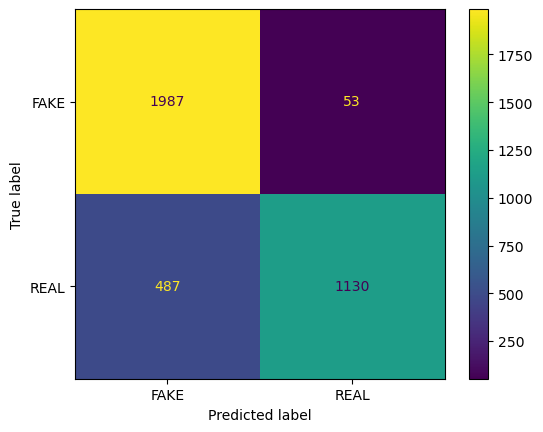

In [22]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FAKE", "REAL"])
disp.plot()
plt.show()

In [23]:
grid_cv = GridSearchCV(MultinomialNB(), param_grid={"alpha": np.arange(0.5,2,0.1)}, cv=10)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'alpha': 0.5}
0.856577147382821


accuracy 0.8613617719442166


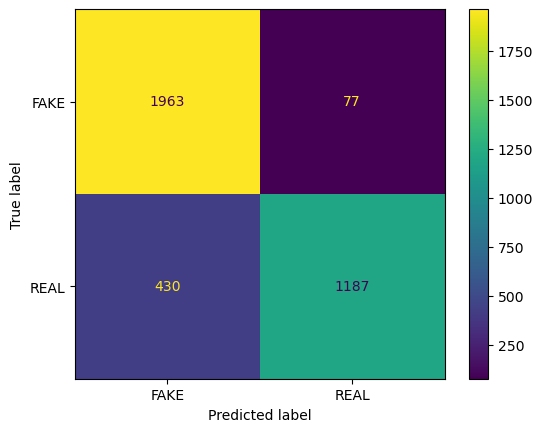

In [24]:
nb = MultinomialNB(alpha=0.5)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("accuracy", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["FAKE", "REAL"])
disp.plot()
plt.show()

## Final Model

In [25]:
# Training
df = pd.read_csv("fake-news/train.csv")
messages = df.dropna().reset_index()
lemma = WordNetLemmatizer()
corpus = []
for i in range(len(messages)):
    review = re.sub("[^a-zA-Z]", " ", messages["title"][i]).lower().split()
    review = [lemma.lemmatize(word) for word in review if not word in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)
cv = CountVectorizer(max_features = 5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = messages['label']
nb = MultinomialNB(alpha=1.5)
nb.fit(X, y)

MultinomialNB(alpha=1.5)

In [26]:
# Submission
test_df = pd.read_csv("fake-news/test.csv")
test_df.fillna("",inplace=True)
lemma = WordNetLemmatizer()
corpus = []
for i in range(len(test_df)):
    review = re.sub("[^a-zA-Z]", " ", test_df["title"][i]).lower().split()
    review = [lemma.lemmatize(word) for word in review if not word in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)
cv = CountVectorizer(max_features = 5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y_pred = nb.predict(X)
submit = test_df[["id"]]
submit["label"] = y_pred
submit.to_csv("fake-news/submission/submit.csv", index=False)